# **Movie Genre classification >> codesoft internship task 1** #
the goal of our project is generate a machine learning model to be abel to help Movie Genre classification
that can help organize data in database system and make prediction based on text-plot summary

# **Importing machine learning with NLP libraries** #

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer ,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix



 # **load train dataset** #

In [2]:
train_path='D:/codesoft/task1/Genre Classification Dataset/train_data.txt'
train_data=pd.read_csv(train_path , sep=":::" , engine='python' , names=['title' ,'genre','description'])

In [3]:
train_data.head()

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
print(train_data.describe())

                                 title    genre  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                              description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  


In [5]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None


In [6]:
print(train_data.isnull().sum())

title          0
genre          0
description    0
dtype: int64


# **Load test dataset** #

In [7]:
test_path='D:/codesoft/task1/Genre Classification Dataset/test_data.txt'
test_data=pd.read_csv(test_path , sep=":::" , engine='python' , names=['title' ,'genre','description'])

In [8]:
test_data.tail()

,title,genre,description
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."
54199,54200,Curitiba Zero Grau (2010),"Curitiba is a city in movement, with rhythms ..."


# **plot the distribution of genre using seabor , matplotlip** # 

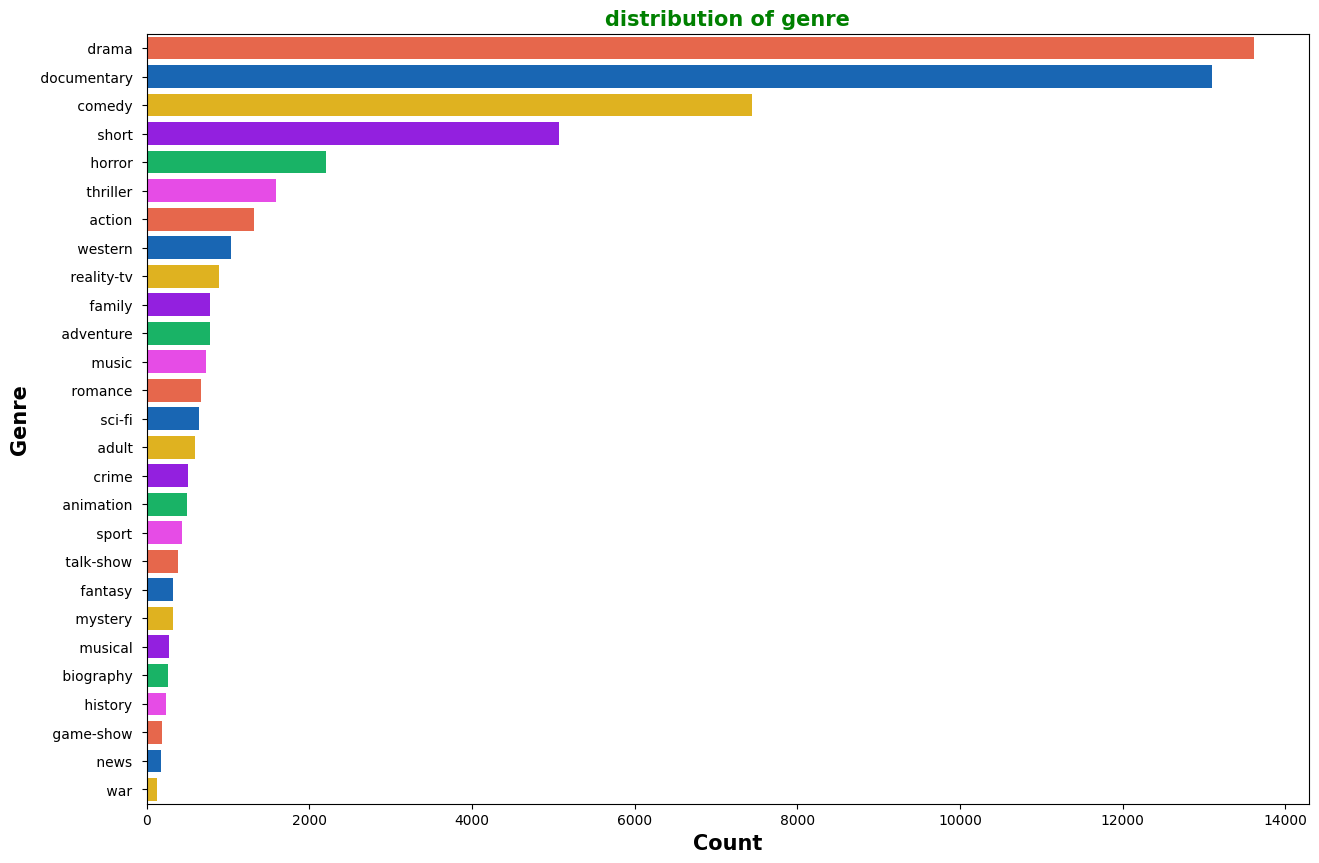

In [9]:
plt.figure(figsize=(15,10))
palette = ["#FF5733", "#0066CC", "#FFC300", "#9900FF", "#00CC66", "#FF33FF"]

sns.countplot(data=train_data ,order=train_data['genre'].value_counts().index,y='genre',palette=palette)
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('Genre', fontsize=15, fontweight='bold')
plt.title("distribution of genre" , fontdict={"size":15 ,"weight":"bold" , "color":"green"})
plt.show()


# **Data cleaning (preprocessing)** #

In [10]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
stem=nltk.stem.LancasterStemmer()

# **data cleaning function** #

In [11]:
def data_clean(text):
   
    text = re.sub(r'@\S+', '', text) 
    text = re.sub(r'http\S+', '', text)  
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  
    text = text.lower()  # Lowercase all characters
    words = nltk.word_tokenize(text)
    text = "".join([i for i in text if i not in string.punctuation])
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip() 
    return text
train_data["text_clean"]=train_data['description'].apply(data_clean)
test_data["text_clean"]=test_data['description'].apply(data_clean)

# **apply tfidf** #

In [12]:
tf_idf=TfidfVectorizer()
X_train=tf_idf.fit_transform(train_data['text_clean'])
X_test=tf_idf.transform(test_data['text_clean'])

# **Data preprocessing and Naive bayes apply** #

In [13]:
x=X_train
y=train_data["genre"]
x_train , x_test ,y_train ,y_test=train_test_split(x,y ,random_state=42 ,test_size=0.2)
from sklearn.naive_bayes import MultinomialNB
NVB=MultinomialNB()
NVB.fit(x_train,y_train)
y_predict=NVB.predict(x_test)

accuracy=accuracy_score(y_test , y_predict)

print(f"the model accuracy = \n {accuracy}")

print(classification_report(y_test, y_predict)) 

the model accuracy = 
 0.4462787051553998
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.62      0.04      0.08      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.

c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# **confusion matrix** #

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


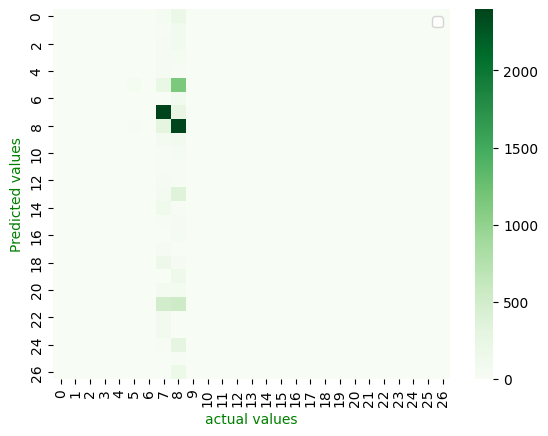

In [17]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,cmap="Greens")
plt.xlabel("actual values" ,fontdict={"size":10,"color":"green"})
plt.ylabel("Predicted values",fontdict={"size":10,"color":"green"})
plt.legend()
plt.show()

# **make prediction on test data** #

In [14]:
X_test_predictions = NVB.predict(X_test)
test_data['Predicted_Genre'] = X_test_predictions 

test_data.to_csv('predicted_genres.csv', index=False)

# **Thanks to listen** #

# *Omar Mohamed* #